In [1]:
# start by importing our usual things
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Activity #1
## Just for fun, in case you missed it at the end of the notes of last week
* if you downloaded image #2 from last week (or "Image example" from this week), it should be in your downloads directory
* This shows how smoothing might look on another 2D image

In [4]:
# note, need this for re-running, not for first time
plt.style.use("classic")

# just for fun (and to see the comparitive effects of smoothing):
import PIL.Image as Image
import PIL.ImageFilter as ImageFilter
import matplotlib.pyplot as plt
im = Image.open("/Users/jillnaiman/Downloads/littleCorgiInHat.png", "r")

import ipywidgets

@ipywidgets.interact(radius=(1,100,5))
def make_plot(radius):
    myFilter = ImageFilter.GaussianBlur(radius=radius)
    smoothed_image = im.filter(myFilter)

    # plot originonal image
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(im)
    ax[1].imshow(smoothed_image)

# note how pixelated the last image becomes
#  the upshot is that when we give up detail we 
#  can then remap our data onto a larger grid
#  if we set radius == 100, we can almost 
#  represent our little corgi with a single
#  pixel at 1 color
# Something to consider going forward

interactive(children=(IntSlider(value=46, description='radius', min=1, step=5), Output()), _dom_classes=('widg…

# Activity #2: Affline Transformations - Quick examples
* We'll just do a quick example on a more complex case => image manipulation
* The references are: https://stackoverflow.com/questions/7501009/affine-transform-in-pil-python and https://stackoverflow.com/questions/17056209/python-pil-affine-transformation

In [5]:
# this is a library you can download from the webpage for
#  week 05
#  put in your notebook directory or use
# import sys
# sys.path.append(PATH_TO_YOUR_LIBRARY_FILE)

from affline_transformation import ScaleRotateTranslate

# do 1 at a time
angle = 45 # degrees
newCenter = (400,500)
oldCenter = im.size
scale = (2, 0.5)
newImage = ScaleRotateTranslate(im, angle, center=oldCenter, new_center=newCenter, scale=scale)


fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(newImage)


ModuleNotFoundError: No module named 'affline_transformation'

## Take aways
* while this was a super quick overview, you can play with manipulating images with affline transformations
* the math for moving objects on your plot is much easier, you can just pre-scale or translate your data points
* Also: note how we created our own stand-alone library that we called within Python - aren't we the coolest!

# Activity #3: RGB values to Color - Looking at matplotlib colormaps

In [6]:
# lets import the color maps from matplotlib
import matplotlib.cm as cm

In [7]:
# we're going to set our figure sizes for all our plots
plt.rcParams["figure.figsize"] = (12, 10) # might change for presenting
# again, make our figures larger, 100 is probably better for presenting
plt.rcParams["figure.dpi"] = 200
# we're going to use a bunch of seaborn figure 
#  defaults for niceness
plt.style.use("seaborn")

FYI: viridis is the new default colormap in matplotlib.  For a great description of how this was developed and why, see Stefan Van der Walt's [talk from SciPy 2015](https://www.youtube.com/watch?v=xAoljeRJ3lU).

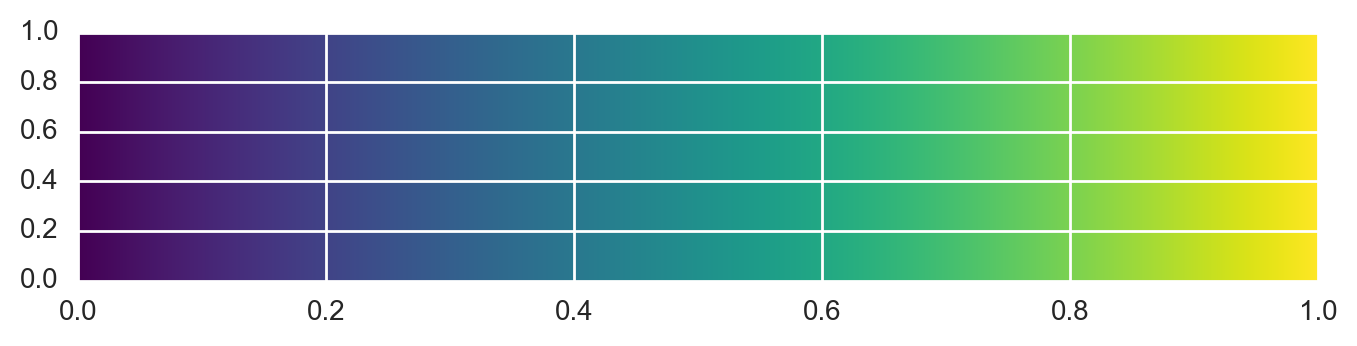

In [8]:
# (0) first off we are going to make use of mgrid in numpy
#  what on earth is that?
np.mgrid?
np.mgrid[0:5]
# we can also specify steps
np.mgrid[0:5:10j]
# so, now we see our numbers are going still
#  from 0-5 but in 2x as many steps
#  "10j" is a way of specifing number of steps
# usually we want to map from 0-255 colors, so we
#  can use
np.mgrid[0.0:1.0:256j]


# (1) grab the viridis RGB colors
viridis = cm.viridis(np.mgrid[0.0:1.0:256j]) # gives the whole RGBA
viridis = cm.viridis(np.mgrid[0.0:1.0:256j])[:,:3] # grabs just RGB
# what does this look like?
viridis

# (2) lets make a visualization of this colormap
# lets make an image that is 256 X 256 pixels in shape
im = np.ones((viridis.shape[0], viridis.shape[0], 4))
# this is just a place holder to store RGBA values for 
# each pixel of our image
#  again the "A" is just a measure of transparency
im

# (3) now, lets fill our image
# the im[...,:3] just pulls out the RGB sections
# of our array and does not select the A values
# the viridis[None,:,:] was just fancy formatting
#  not necessary, simplier:
im[...,:3] *= viridis
im

# (4) now you'll notice that the values of 
#    RGB go from 0->1 instead of 0->255
#    we can change this if we want to like so:
#im *= 255
#im = im.astype("uint8")

# or we can just plot the thing!
plt.imshow(im, extent = [0.0, 1.0, 0.0, 1.0], aspect = 1.0/5)

# note here that the axis are meaningless => just a way to 
#  spread out what our colormap looks like

In [9]:
# we can visualize a few colormaps this way using widgets if 
#  we want to take a quick look at a few
import ipywidgets

@ipywidgets.interact(cmap=cm.cmap_d)
def make_plot(cmap):
    mymap = cmap(np.mgrid[0.0:1.0:256j])[:,:3]
    im = np.ones((mymap.shape[0], mymap.shape[0], 4))
    im[...,:3] *= mymap
    plt.imshow(im, extent = [0.0, 1.0, 0.0, 1.0], aspect = 1.0/5)



interactive(children=(Dropdown(description='cmap', options={'Blues': <matplotlib.colors.LinearSegmentedColorma…

<Figure size 800x500 with 0 Axes>

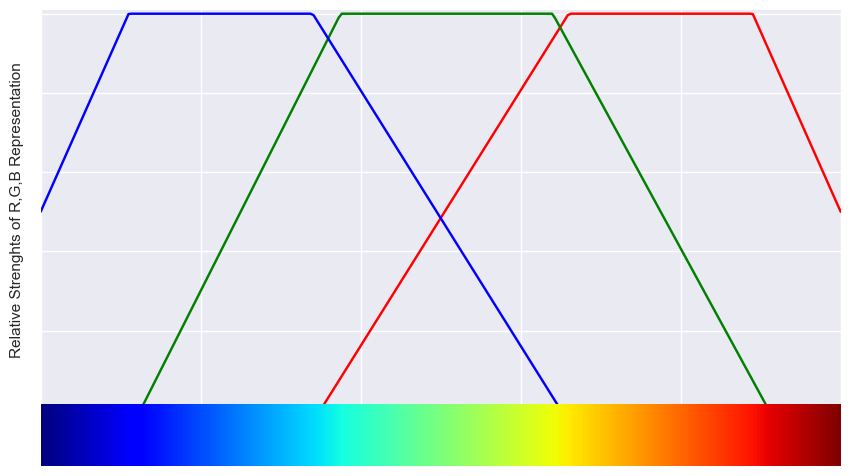

In [10]:
# ok, now lets make things a bit more complicated and see how colors relate to the relative levels of R, G, B
#  in our images


def plot_rgb(cmap_name):
    # (1) grab colormap and reformat into our array
    N = 256
    colors = cm.cmap_d[cmap_name](np.mgrid[0.0:1.0:N * 1j])[:,:3]
    #print(colors)

    # (2) Now we want to place a plot of our RGB space on top
    #  and a spectrum like we've been calculating before on 
    #  the bottom, so we are going to place axes by hand
    plt.clf()
    fig = plt.figure()
    ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) # first set of axis
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,0], '-r')
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,1], '-g')
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,2], '-b')
    plt.ylabel('Relative Strenghts of R,G,B Representation')
    
    # (3) This again is just our colormap spread across 
    #  arbitrary axis, we could have easily mapped to 
    #  0=> 255 or 0=>10000 on the x-axis for the same 
    #  meaning, so lets not distract our viewer and 
    #  take off the axis
    plt.xlim(0.0, 1.0) # first I'm just gonna set this a little wider so the tops don't get cut off
    plt.ylim(0.0, 1.01)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    # (4) But how would this colormap look in colors to our eyes?
    #  lets make a little "spectrum"-like plot at the 
    #  end of our figure
    ax = fig.add_axes([0.0, 0.0, 1.0, 0.2])
    im = np.ones((colors.shape[0], colors.shape[0], 4))
    im[...,:3] *= colors
    # old
    ##im = np.ones((1, N, 3), dtype="uint8")
    ##im *= (colors*255).astype("uint8")[None, :, :]
    ax.imshow(im, interpolation='nearest', 
              extent = [0.0, 1.0, 0.0, 1.0], aspect = 20.0/N)
    
    # (5) now, lets again make this a little nicer looking
    # first set the limit by hand
    plt.xlim(0.0, 1.0)
    # take of x-tick labels
    ax.xaxis.set_ticklabels([])
    # take of ticks - gets rid of white lines along x
    ax.xaxis.set_visible(False)
    ax.yaxis.set_ticklabels([])
    ax.yaxis.set_visible(False) # no horizontal white lines

    
# better size for presenting
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (8, 5)

cmap_name = 'jet'
plot_rgb(cmap_name)

In [11]:
# hurray!  
# of course, we can do this for all the matplotlib colormaps! => interactively!

@ipywidgets.interact(cmap=cm.cmap_d)
def plot_rgb(cmap):
    N = 256
    # a little different to make use of what we did before
    #colors = cm.cmap_d[cmap_name](np.mgrid[0.0:1.0:N * 1j])[:,:3]
    colors = cmap(np.mgrid[0.0:1.0:N * 1j])[:,:3]
    plt.clf()
    fig = plt.figure()
    ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) # first set of axis
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,0], '-r')
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,1], '-g')
    plt.plot(np.mgrid[0.0:1.0:N*1j], colors[:,2], '-b')
    plt.ylabel('Relative Strenghts of R,G,B Representation')
    plt.xlim(0.0, 1.0) # first I'm just gonna set this a little wider so the tops don't get cut off
    plt.ylim(0.0, 1.01)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax = fig.add_axes([0.0, 0.0, 1.0, 0.2])
    im = np.ones((colors.shape[0], colors.shape[0], 4))
    im[...,:3] *= colors
    ax.imshow(im, interpolation='nearest', extent = [0.0, 1.0, 0.0, 1.0], aspect = 20.0/N)
    plt.xlim(0.0, 1.0)
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_ticklabels([])
    ax.yaxis.set_visible(False) 

    
# a few to highlight:
# (1) viridis - what we have used for the above examples & a carefully chosen map
# (2) jet - an example of an intuively constructed colormap that can be misleading
#     in practice - more on that later
# (3) gray - just grows linearly from 0..1 simultaneously in all three channels.
# (4) gist stern - According to https://gist.github.com/endolith/2719900 , 
#     this came from the Yorick package, and before that, IDL. 
#     it was used a lot in astronomy
# (5) flag - repeating, could be good to highlight levels, but I've never seen it
#      used & it probably will just confuse folks
# (6) magma - new colormap from matplotlib designed for 
#      accessibility and perceptual uniformity.
# (7) PuRd - I used this a lot in my astrophysics papers - much to the 
#      quiet dismay of my PhD advisor :D


interactive(children=(Dropdown(description='cmap', options={'Blues': <matplotlib.colors.LinearSegmentedColorma…

## Take aways
* We can translate between matplotlib colormaps and RGB representations to show how R,G,B combinations look to our eyes
* There are a variety of colormaps that can be used to highlight different parts of you viz
### Important considerations: do not lie with colormaps (if we have time)
* just say no to bad colormaps: https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

# Activity #4: Palettes - picking colors to define your colormap
* we've been using RGB sequences to smear together into colormaps
* now we will focus on methods to instead pick specific colors and mesh them into colormaps

In [10]:
# note: you will have to install this
#  I used pip, but you can also use anaconda
# **** HAVE STUDENTS DO THIS IN BREAK!!!!****
import palettable

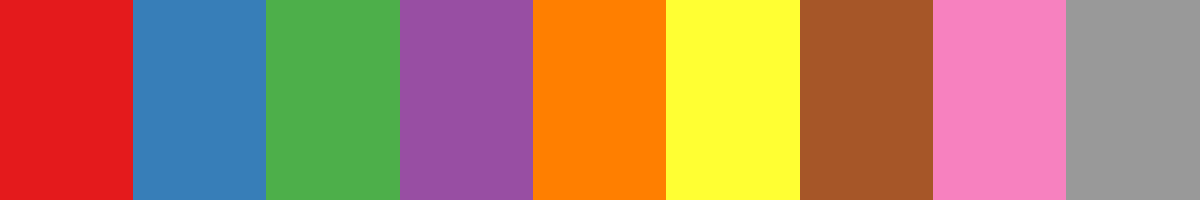

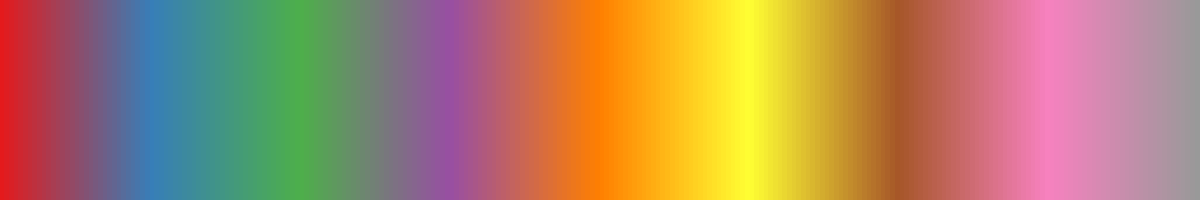

In [12]:
# lets just pull a random palette and see what it looks like
# in both its original colors and as a continious colormap
from palettable.colorbrewer.qualitative import Set1_9
Set1_9.show_discrete_image(size=(12,2))
Set1_9.show_continuous_image(size=(12,2))

In [15]:
# lets once again import some pre-defined functions from 
# palette_colors.py to do some things for us
# again, make sure this is saved in your jupyter notebook directory
# or modify your path
from palette_colors import get_cb_diverging, get_cb_qualitative, get_cb_sequential,grab_names_palettable

In [16]:
# lets pick one of a color palette for diverging colors, sequential, or qualitative (like above)

# lets try diverging first
names = grab_names_palettable('Diverging')
ipywidgets.interact(get_cb_diverging, name = names,  number = (1, 12))
# note we are calling ipywidgets directly here

interactive(children=(Dropdown(description='name', index=8, options=('BrBG', 'PiYG', 'PRGn', 'PuOr', 'RdBu', '…

<function palette_colors.get_cb_diverging(name='Spectral', number=9)>

In [15]:
# lets try diverging first
names = grab_names_palettable('Sequential')
ipywidgets.interact(get_cb_sequential, name = names,  number = (1, 12))
# note we are calling ipywidgets directly here

interactive(children=(Dropdown(description='name', options=('Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys'…

<function palette_colors.get_cb_sequential(name='Blues', number=9)>

In [16]:
# lets try diverging first
names = grab_names_palettable('Qualitative')
ipywidgets.interact(get_cb_qualitative, name = names,  number = (1, 12))
# note we are calling ipywidgets directly here

interactive(children=(Dropdown(description='name', index=5, options=('Accent', 'Dark2', 'Paired', 'Pastel1', '…

<function palette_colors.get_cb_qualitative(name='Set1', number=9)>

### Aside: a bit about cubehelix
* also, as an aside, cubehelix will show up as a colormap
* a lot - both here and a lot in seaborn
* lots of details here: https://www.mrao.cam.ac.uk/~dag/CUBEHELIX/

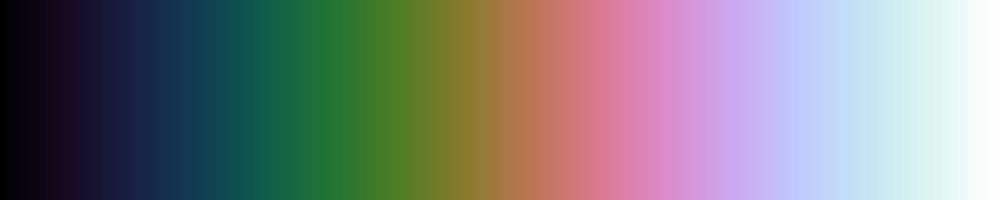

In [17]:
palettable.cubehelix.classic_16.show_continuous_image(size=(10,2))

# Activity #5: Appling colormaps to real data
* data location for brain scan: http://use.yt/upload/a082bb26 
* michigan depth map: https://www.ngdc.noaa.gov/mgg/greatlakes/michigan.html (binary float data linked on that page)

In [1]:
import h5py # you may have to install this as well
# might not get to the dataset were we use it 
#  however

In [4]:
# lets import our 2 datasets
# if died
import numpy as np
import matplotlib.pyplot as plt

# depth in meters
fn1 = "/Users/jillnaiman1/Downloads/michigan_lld.flt"
michigan = np.fromfile(fn1, dtype='f4').reshape((5365, 4201))
# this reshape is just to go from a 1D array to the 
# correct 2d shape

# NOTE: we may not get to this one
# how to open an hdf5 file
fn2 = "/Users/jillnaiman1/Downloads/single_dicom.h5"
with h5py.File(fn2) as f:
    scan = f["/scan"][:]

In [5]:
# what do these things look like?
michigan.shape, scan.shape
# so, we can see that michigan is a 2D dataset & scan is 3D

((5365, 4201), (36, 512, 512))

(array([  285668.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 22252697.]),
 array([-9999.     , -8963.905  , -7928.8115 , -6893.717  , -5858.6226 ,
        -4823.5283 , -3788.4338 , -2753.3396 , -1718.2452 ,  -683.1509 ,
          351.94348], dtype=float32),
 <a list of 10 Patch objects>)

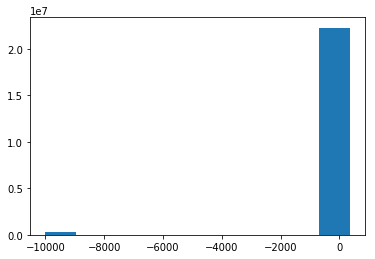

In [6]:
# lets take a quick look at a histogram of the michigan data
plt.hist(michigan.flat)

In [7]:
# so, there looks to be a super weird data point:
michigan.min()

-9999.0

In [8]:
# lets do an easy cleaning of this data for viz purposes
michigan[michigan == -9999] = np.nan
# what are new min & max
np.nanmin(michigan), np.nanmax(michigan)

(-275.89, 351.94348)

### Intro to the Michigan dataset

In [9]:
# compare now to straight min & max calls with numpy
michigan.min(), michigan.max()

/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


(nan, nan)

(array([4.305380e+05, 9.692900e+05, 2.736477e+06, 3.288539e+06,
        4.979745e+06, 5.412426e+06, 2.916778e+06, 1.280268e+06,
        2.349550e+05, 3.681000e+03]),
 array([-275.89    , -213.10666 , -150.32332 ,  -87.53996 ,  -24.756617,
          38.026733,  100.81008 ,  163.59343 ,  226.37679 ,  289.16013 ,
         351.94348 ], dtype=float32),
 <a list of 10 Patch objects>)

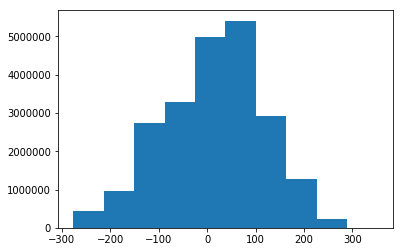

In [11]:
# we can replot our histogram as well just to check it out
plt.hist(michigan[~np.isnan(michigan)])
# here the mask is ~ = NOT an NaN

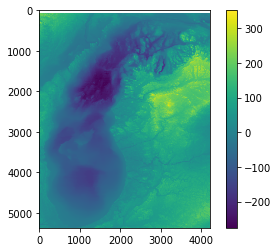

In [12]:
# ok, now that we have a sense of our data, lets 
#  do a quick plot
plt.imshow(michigan)
plt.colorbar()

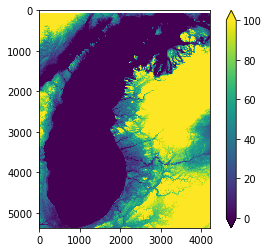

In [13]:
# lets play around with this default colormap
plt.imshow(michigan)
plt.clim(0, 100) # only plot from depths of 0->100
plt.colorbar(extend = 'both') # add little arrow ends

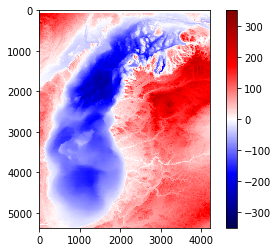

In [14]:
# recall our min&max depth in meters
# (-275.89, 351.94348)
plt.imshow(michigan, cmap="seismic")
plt.clim(-352, 352) # lets remap over an evenly distributed color map
plt.colorbar()
# note this is an example of a divering colormap

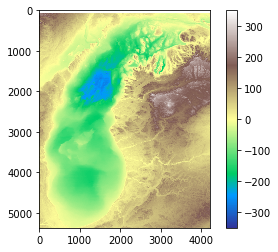

In [15]:
# there are actually some colormaps 
#  that are built to highlight different
#  parts of maps like this:
plt.imshow(michigan, cmap="terrain")
plt.clim(-352, 352)
plt.colorbar()
# another diverging colormap, but here we 
# see that the blue/green is probably
# water (negative height) and the 
#  land is highlighted with brown & white

In [16]:
# now, lets say we want to show a sharp contrast
# in our color map from the negative to the positive
# numbers

# we can do this by rescaling the colormap with
# another matplotlib set of functions:
import matplotlib.colors as colors

# if I haven't already, lets make a bigger pic
plt.rcParams["figure.dpi"] = 200 # or 100

(array([0.     , 1.     , 1.69897]), array([0.     , 1.     , 1.69897]))

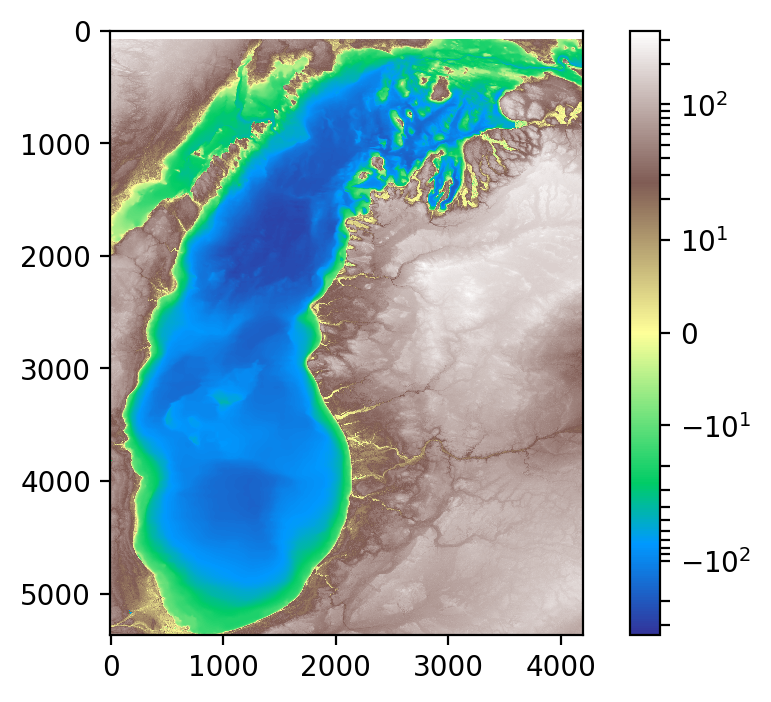

In [21]:
plt.imshow(michigan, cmap="terrain", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()
# if we now look at our image, we see some
#  interesting things
#  so, now there is a sharp contrast between
#  negative & positive depths/heights
#  and there is not as much contrast between
#  blue/green or brown/white

# why?
colors.SymLogNorm?
# this is a symmetrical log scale
#  so it logs things both in the negative & positive directions
# example:
np.log10([1,10,50]),np.log10(np.abs([-1,-10,-50]))
# so we see that 1 and 10 are mapped to a jump of 1
#  but 1->50 is mapped only to a jump of 0.7 instead of 40

(3300, 3900)

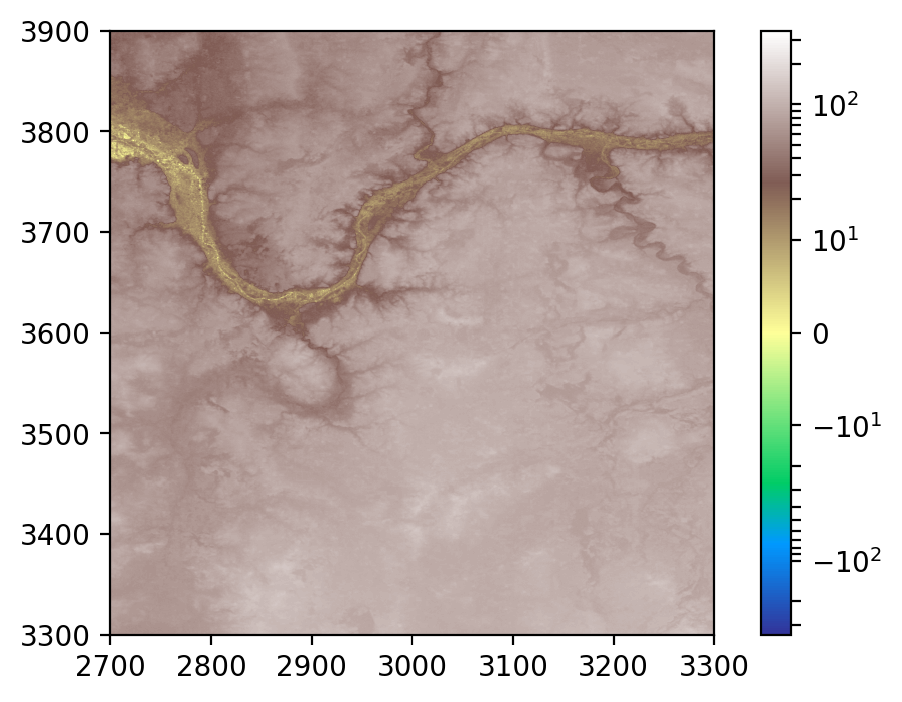

In [22]:
# this is a very high resolution map, so we can zoom in
plt.imshow(michigan, cmap="terrain", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()
plt.xlim(2700, 3300)
plt.ylim(3300, 3900)

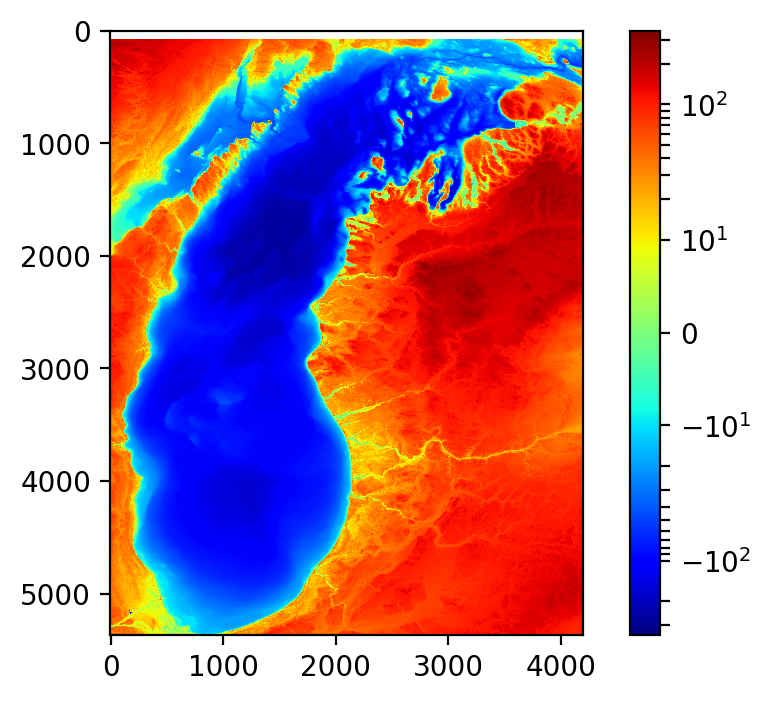

In [23]:
# and just for fun, here is how it looks with our bad "jet" colormap
plt.imshow(michigan, cmap="jet", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()
# ew.

In [25]:
# lets put all these ideas together as an interactive widget
# build it up step by step

#(1) 
# if we haven't already
import ipywidgets

@ipywidgets.interact(colormap = plt.colormaps(),
                     color_range = (1.0, 352.0, 1.0),
                     sym_log=True)

def plot(colormap = 'terrain', color_range = 352, sym_log = True):
    if sym_log:
        norm = colors.SymLogNorm(10)
    else:
        norm = colors.Normalize()
        
    plt.imshow(michigan, cmap=colormap, norm = norm)
    plt.clim(-color_range, color_range)
    plt.colorbar(extend = 'both')

interactive(children=(Dropdown(description='colormap', index=154, options=('Accent', 'Accent_r', 'Blues', 'Blu…

In [27]:
# if we have time: allow recentring and zooming

# where can we place our x_center? from 0 to the length of 
#  the data on the x-axis, in steps of 30 pixels
x_center = (0, michigan.shape[0], 30)

# same for y-centers
y_center = (0, michigan.shape[1], 30)

# what are the limits we want to set for the width?
# lets choose anywhere from 100 to 5000 pixels
#  in steps of 100 pixels
width = (100, 5000, 100)

@ipywidgets.interact(colormap = plt.colormaps(),
                     color_range = (1.0, 352.0, 1.0),
                     sym_log=True,
                    x_center = x_center, 
                    y_center = y_center,
                    width=width)

def plot(colormap = 'terrain', color_range = 352, sym_log = True,
         x_center = 2000, y_center = 2500, width = 3000):
    if sym_log:
        norm = colors.SymLogNorm(10)
    else:
        norm = colors.Normalize()
        
    plt.imshow(michigan, cmap=colormap, norm = norm)
    plt.clim(-color_range, color_range)
    plt.colorbar(extend = 'both')
    
    # for recenering
    x_min = x_center - width / 2.0
    x_max = x_center + width / 2.0
    y_min = y_center - width / 2.0
    y_max = y_center + width / 2.0
    plt.xlim(x_min, x_max)
    plt.ylim(y_max, y_min)


interactive(children=(Dropdown(description='colormap', index=154, options=('Accent', 'Accent_r', 'Blues', 'Blu…

### Intro to the brain scan data

In [28]:
# recall this is 3D data
scan.shape

(36, 512, 512)

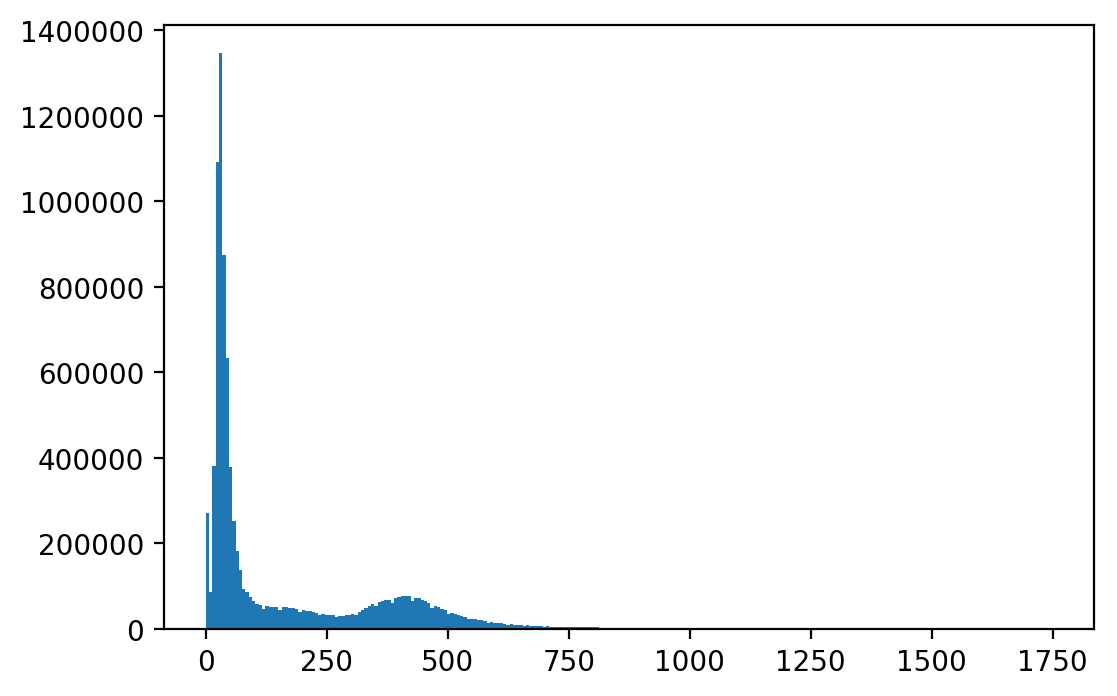

In [30]:
# lets do a quick histogram to see 
#  if there are weird values like in 
#  the michigan data
x=plt.hist(scan.flat, bins=256) # I just say x= so there aren't any outputs
#                                 its a hack! :D
# the "flat" just puts all the values from 3D into 1D for histogramming

In [31]:
# nothing looks super weird, lets look at some quick stats
scan.min(), scan.max()
# if we know things about MRIs we know that there can
#  either be areas that aren't illuminated (the background)
#  and also areas that are, so it makes sense that
#  the min is zero

(0.0, 1747.0)

In [32]:
# what are the stats of this scan?
scan.mean(), scan.std()
# this might help in choosing colors

(159.75500689612494, 191.7363424834759)

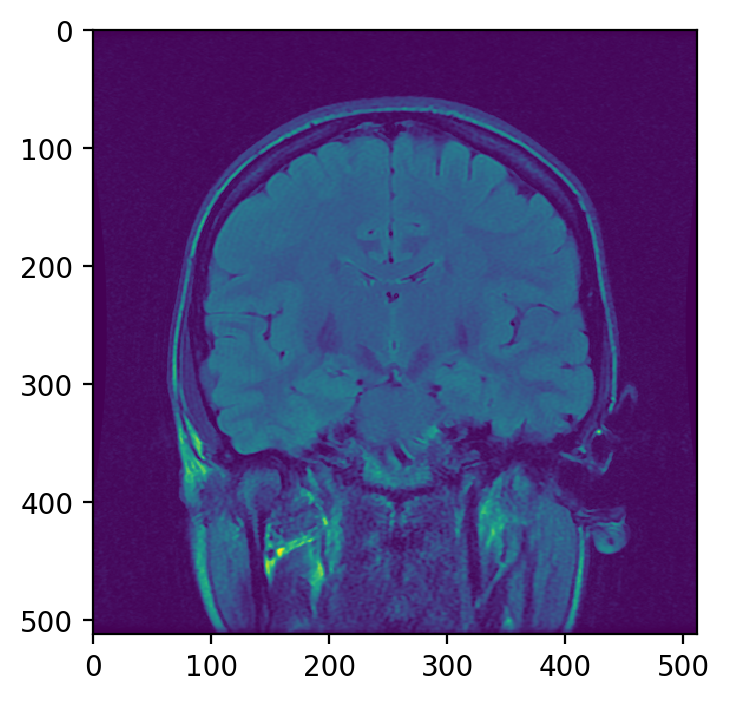

In [33]:
# ok, we know this is a 36 X 512 X 512 image
# lets plot right down the middle of the shortest
#  dimension
plt.imshow(scan[18, :, :])

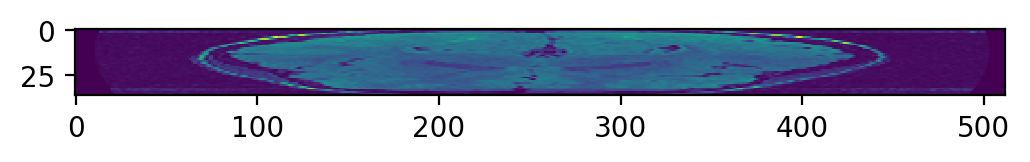

In [35]:
# that was a cut through Z, we can also do one in the x or y plane:
plt.imshow(scan[:, 256, :])

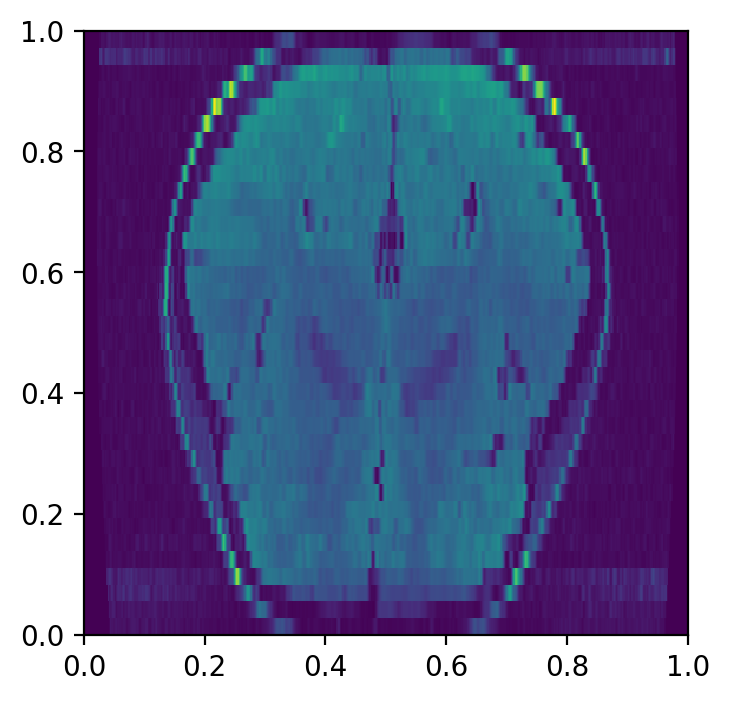

In [36]:
# note the above looks squished along its shorter dimension, 
#  so lets try again:
plt.imshow(scan[:, 256, :], extent = [0.0, 1.0, 0.0, 1.0])
# we now can tell this is at lower resolution

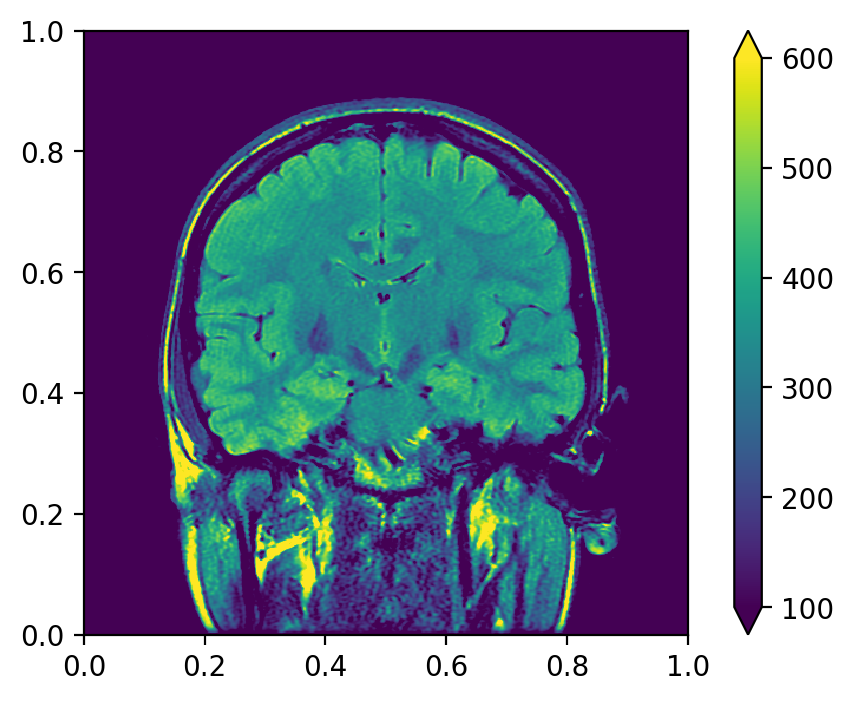

In [37]:
# lets go back to our higher resolution plane and plot with a colorbar
plt.imshow(scan[18, :, :], extent = [0.0, 1.0, 0.0, 1.0])
plt.clim(100, 600)
plt.colorbar(extend='both')

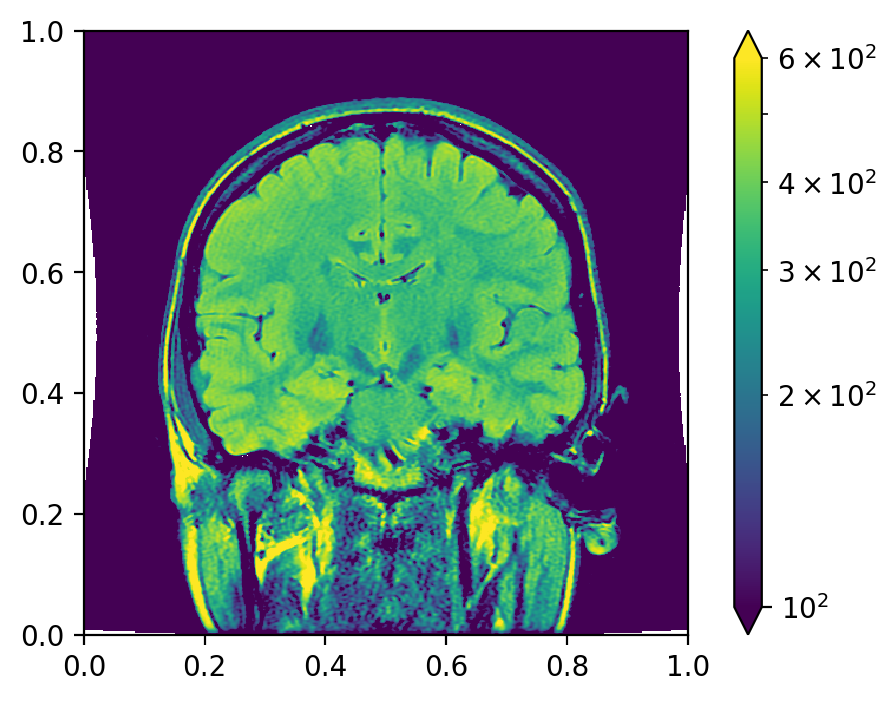

In [38]:
# again, we can do things with a norm in log space for the colors
plt.imshow(scan[18, :, :], extent = [0.0, 1.0, 0.0, 1.0], norm = colors.LogNorm())
plt.clim(100, 600)
plt.colorbar(extend='both')

In [39]:
# since this is a 3D dataset, we can also scan through
#  the data interactively
# here we'll set "index" to go along the shorter dimension: up to 36 slices
@ipywidgets.interact(colormap = plt.colormaps(), index = (0, 35, 1),
                     cmin = (0.0, 1750.0, 1.0), cmax = (0.0, 1750.0, 1.0))
def plot(colormap = 'gray', index = 18, cmin = 1.0, cmax = 600.0):
    plt.imshow(scan[index, :, :], extent = [0., 1., 0., 1.], cmap=colormap)
    plt.clim(cmin, cmax)
    plt.colorbar(extend = 'both')

interactive(children=(Dropdown(description='colormap', index=116, options=('Accent', 'Accent_r', 'Blues', 'Blu…